#Business Objective

 

#Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.

#Mercari, Japan’s biggest community-powered shopping app, knows this problem deeply. They’d like to offer pricing suggestions to sellers, but this is tough because their sellers are enabled to put just about anything, or any bundle of things, on Mercari's marketplace.

#In this project, Mercari’s challenging us to build an algorithm that automatically suggests the right product prices.

  

#Data Overview
 

#There are two files available. They are train.tsv and test.tsv

#Both are tab separated files

#The following are the data fields

#train_id or test_id - the id of the listing
#name - the title of the listing. Note that we have cleaned the data to remove text that looks like prices (e.g. $20) to avoid leakage. These removed prices are represented as [rm]
#item_condition_id - the condition of the items provided by the seller
#category_name - category of the listing
#brand_name
#price - the price that the item was sold for. This is the target variable that you will predict. The unit is USD. This column doesn't exist in test.tsv since that is what you will predict.
#shipping - 1 if shipping fee is paid by seller and 0 by buyer
#item_description - the full description of the item. Note that we have cleaned the data to remove text that look like prices (e.g. $20) to avoid leakage. These removed prices are represented as [rm]
  

#Source  https://www.kaggle.com/c/mercari-price-suggestion-challenge/overview/description

 

In [14]:
train_df= read.csv(file='train.tsv', sep='\t', header=TRUE)
test_df= read.csv(file='test.tsv', sep='\t', header=TRUE)


In [41]:
dim(train_df)

[1] 29999     8

In [ ]:
#Approach 

#Exploratory Data Analysis
#Exploratory data analysis is the process of analysing the dataset to understand its characteristics. In this step, we perform the following.

#Univariate analysis - Analysis of a single variable
#Bivariate analysis - Analysis of relationship between two variable

In [18]:
dim(test_df)

[1] 145998      7

In [20]:
colnames(train_df)

[1] "train_id"          "name"              "item_condition_id"
[4] "category_name"     "brand_name"        "price"            
[7] "shipping"          "item_description"

In [22]:
colnames(test_df)

[1] "test_id"           "name"              "item_condition_id"
[4] "category_name"     "brand_name"        "shipping"         
[7] "item_description"

In [24]:
print("Unique category count")
length(unique(train_df$category_name))
print("Unique item condition coun")
length(unique(train_df$item_condition_id))
print("Unique brand count")
length(unique(train_df$brand_name))

[1] "Unique category count"


[1] 1203

[1] "Unique item condition coun"


[1] 5

[1] "Unique brand count"


[1] 3752

In [26]:
print("Train data summary")
summary(train_df)
print("Test data summary")
summary(test_df)

[1] "Train data summary"


    train_id          name           item_condition_id category_name     
 Min.   :     0   Length:593376      Min.   :1.000     Length:593376     
 1st Qu.:148344   Class :character   1st Qu.:1.000     Class :character  
 Median :296688   Mode  :character   Median :2.000     Mode  :character  
 Mean   :296688                      Mean   :1.908                       
 3rd Qu.:445031                      3rd Qu.:3.000                       
 Max.   :593375                      Max.   :5.000                       
  brand_name            price            shipping      item_description  
 Length:593376      Min.   :   0.00   Min.   :0.0000   Length:593376     
 Class :character   1st Qu.:  10.00   1st Qu.:0.0000   Class :character  
 Mode  :character   Median :  17.00   Median :0.0000   Mode  :character  
                    Mean   :  26.69   Mean   :0.4463                     
                    3rd Qu.:  29.00   3rd Qu.:1.0000                     
                    Max.   :2000.00   

[1] "Test data summary"


    test_id           name           item_condition_id category_name     
 Min.   :     0   Length:145998      Min.   :1.000     Length:145998     
 1st Qu.: 36499   Class :character   1st Qu.:1.000     Class :character  
 Median : 72999   Mode  :character   Median :2.000     Mode  :character  
 Mean   : 72999                      Mean   :1.909                       
 3rd Qu.:109498                      3rd Qu.:3.000                       
 Max.   :145997                      Max.   :5.000                       
  brand_name           shipping      item_description  
 Length:145998      Min.   :0.0000   Length:145998     
 Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Median :0.0000   Mode  :character  
                    Mean   :0.4467                     
                    3rd Qu.:1.0000                     
                    Max.   :1.0000                     

In [40]:
library(tidyverse)

In [14]:
head(train_df)

ERROR: Error in head(train_df): object 'train_df' not found


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



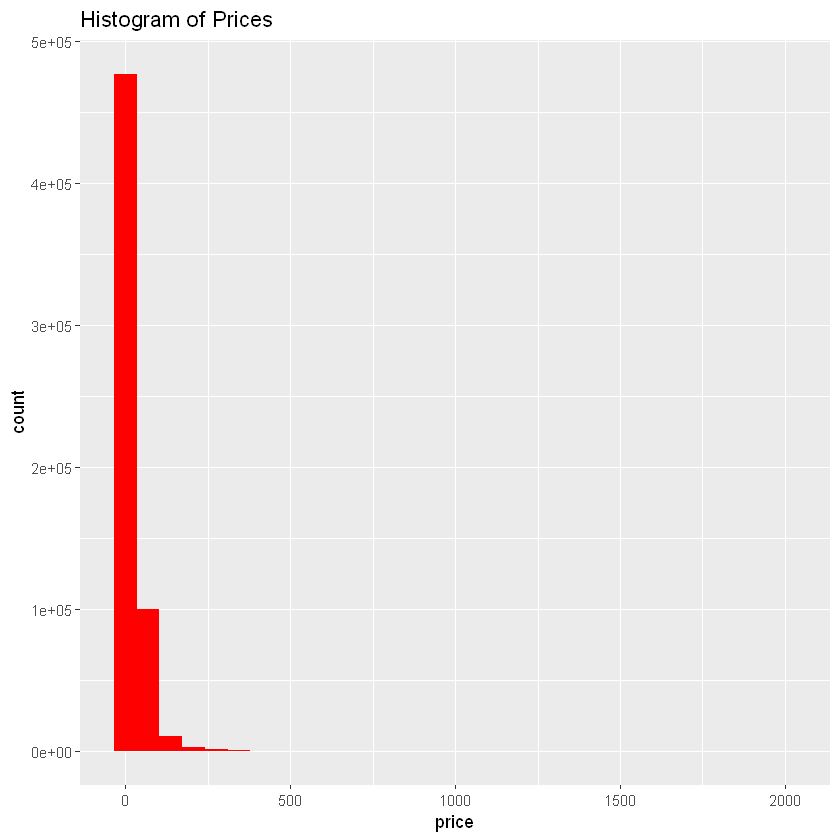

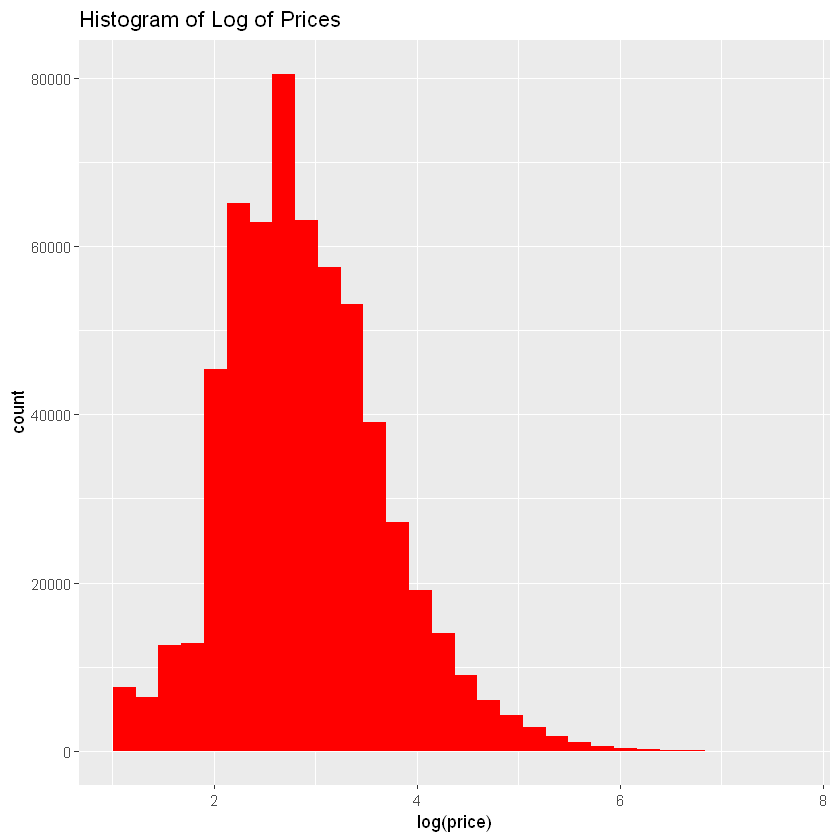

In [46]:
ggplot(data=train_df,aes(x=price)) +
  geom_histogram(fill='red') +
   labs(title="Histogram of Prices")

ggplot(data=train_df,aes(x=log(price))) +
  geom_histogram(fill='red') +
   labs(title='Histogram of Log of Prices')

  

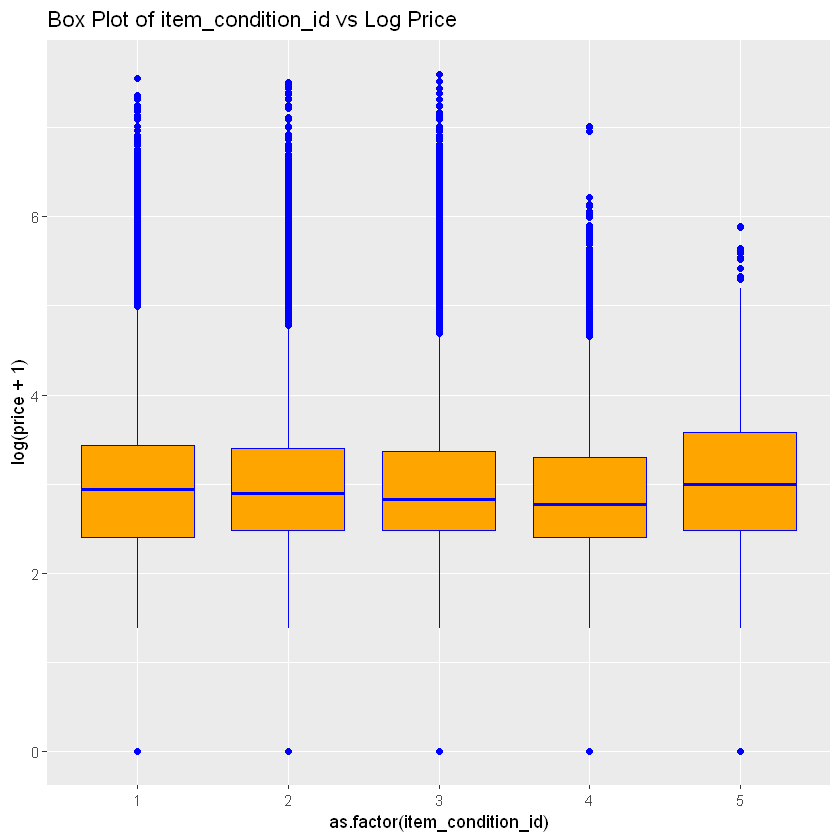

In [48]:
#Box Plot of item vs Price

train_df$item_condition_id<-as.factor(train_df$item_condition_id)

ggplot(data=train_df,aes(x=as.factor(item_condition_id),y=log(price+1))) +
    geom_boxplot(fill= 'orange',color='blue') +
    labs(title= 'Box Plot of item_condition_id vs Log Price')


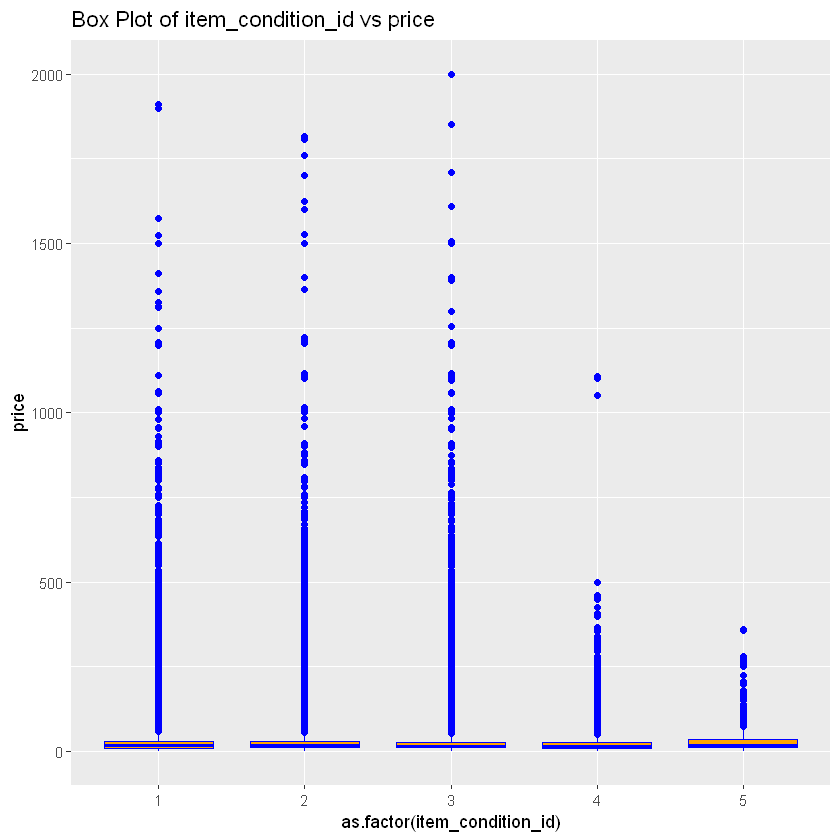

In [49]:
train_df$item_condition_id<-as.factor(train_df$item_condition_id)

ggplot(data=train_df,aes(x=as.factor(item_condition_id), y=price)) +
    geom_boxplot(fill= 'orange',color= 'blue') +
    labs(title= 'Box Plot of item_condition_id vs price')


In [50]:
#Analysis of variants

one.way <- aov(shipping  ~  price, data = train_df)
summary(one.way)


                Df Sum Sq Mean Sq F value Pr(>F)    
price            1   1402  1402.4    5730 <2e-16 ***
Residuals   593374 145230     0.2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

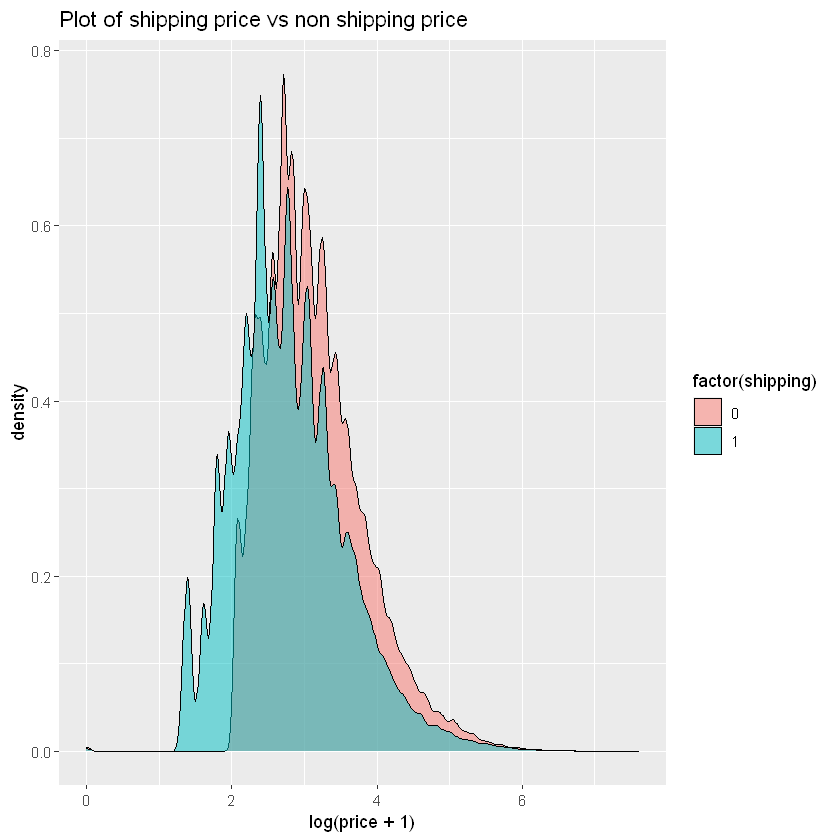

In [54]:
# Density graph of shipping vs price

train_df %>%
     ggplot(aes(x=log(price+1), fill=factor(shipping))) +
     geom_density(alpha=0.5) +
     labs(title= 'Plot of shipping price vs non shipping price')


In [62]:
#Top 10 Based on average and median price

data=ddply(train_df,(brand_name), summarize, "mean"=mean(price), "median"=median(price))
data %>% arrange(desc(mean)) %>% head(10) %>%
  ggplot_point(color='red') +
   coord_flip() +
    scale_y_continous(labels=scales::dollar) +
     labs(title= 'Top 10 brand on average price')





ERROR: Error in ddply(train_df, (brand_name), summarize, mean = mean(price), : could not find function "ddply"


In [63]:
library(plyr)

ERROR: Error in library(plyr): there is no package called 'plyr'


In [64]:
options("repos")[[1]][1]

CRAN 
"https://cran.r-project.org"

#Top 10 Brand based on average and median price

data=ddply(train_df,.(brand_name), summarize, "mean"=mean(price), "median"=median(price))
data %>% arrange(desc(mean)) %>% head(10) %>%
  ggplot(aes(x=reorder(brand_name,mean), y=mean)) +
   geom_point(color='red') +
     coord_flip() +
     scale_y_continuous(labels=scales::dollar) +
     labs(title= 'Top 10 brand on average price')

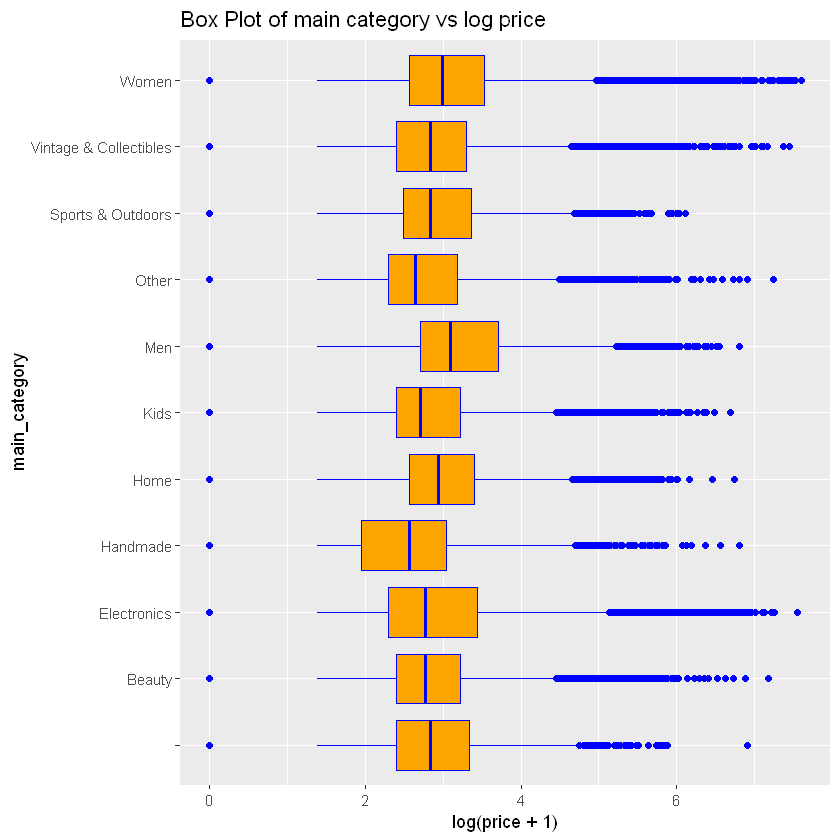

In [85]:
#Box Plot of Category vs Price

train_df %>%
  separate(category_name, c("main_category", "subcat_1", "subcat_2"), sep="/") %>% 
  ggplot(aes(x=main_category, y=log(price+1))) +
    geom_boxplot(fill='orange', color ='blue') +
     coord_flip() +
      labs(title= 'Box Plot of main category vs log price')

In [90]:
# Lets separate category variable into 3 categories

category_name=train_df$category_name
train_df = train_df %>% separate(category_name, c("main_category", "subcat_1", "subcate_2"), sep="/")
train_df$category_name=category_name

In [92]:
head(train_df)

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcate_2,category_name
,<int>,<chr>,<fct>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,,10,1,No description yet,Men,Tops,T-shirts,Men/Tops/T-shirts
2,1,Razer BlackWidow Chroma Keyboard,3,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics,Computers & Tablets,Components & Parts,Electronics/Computers & Tablets/Components & Parts
3,2,AVA-VIV Blouse,1,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women,Tops & Blouses,Blouse,Women/Tops & Blouses/Blouse
4,3,Leather Horse Statues,1,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home,Home DÃ©cor,Home DÃ©cor Accents,Home/Home DÃ©cor/Home DÃ©cor Accents
5,4,24K GOLD plated rose,1,,44,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,Women/Jewelry/Necklaces
6,5,Bundled items requested for Ruie,3,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women,Other,Other,Women/Other/Other


In [8]:
#Label encoding converting categories into numberical categories or form 
#, brand_name, subcat_1, subcat_2

lbl_main_category <- LabelEncoder$new()
lbl_main_category$fit(train_df$main_category)

lbl_brand_name <- LabelEncoder$new()
lbl_brand_name$fit(train_df$brand_name)

lbl_sybcat_1 <- LabelEncoder$new()
lbl_subcat_1$fit(train_df$subcat_1)

lbl_sub_2 <- LabelEncoder$new()
lbl_subcat_2$fit(train_df$subcat_2)

train_df$n_main_category <- lbl_main_category$transform(train_df$main_category)
train_df$n_brand_name = lbl_brand_name$transform(train_df$brand_name)
train_df$n_subcat_1 = lbl_subcat_1$transform(train_df$subcat_1)
train_df$n_subcat_2 = lbl_subcat_2$transform(train_df$subcat_2)

head(train_df)

ERROR: Error in eval(expr, envir, enclos): object 'LabelEncoder' not found


In [10]:
install.packages("superml")

Installing package into 'C:/Users/Ragla/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'superml' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ragla\AppData\Local\Temp\RtmpA5Ibjy\downloaded_packages


In [18]:
library(data.table)
library(caret)
#> Loading required package: lattice
#> Loading required package: ggplot2
library(superml)

library(Metrics)
#> 
#> Attaching package: 'Metrics'
#> The following objects are masked from 'package:caret':
#> 
#>     precision, recall

head(train_df)

ERROR: Error in head(train_df): object 'train_df' not found


In [21]:
myfile = read.csv("c:/Users/Ragla/Downloads/Mercari-price-suggestion-challenge/test.tsv")

In [23]:
test_df= read.csv(file='test.tsv', sep='\t', header=TRUE)

In [25]:
head(test_df)

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,,1,Size 7
2,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined with bubble wrap for protection Self Sealing (peel-and-seal), adhesive keeps contents secure and tamper proof Durable and lightweight Kraft material helps save on postage Approved by UPS, FedEx, and USPS."
3,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coach outlet.
4,3,Floral Kimono,2,Women/Sweaters/Cardigan,,0,-floral kimono -never worn -lightweight and perfect for hot weather
5,4,Life after Death,3,Other/Books/Religion & Spirituality,,1,"Rediscovering life after the loss of a loved one by Tony Cooke. Paperback in good condition 2003. â¤ â¤ Bundle and save! â¤ â¤ Book, death, grief, bereavement SHLF.SW.5.15"
6,5,iPhone 6 Plus or 6s Plus Vodka pink case,1,"Electronics/Cell Phones & Accessories/Cases, Covers & Skins",,1,One Absolut Vodka in Pink for iPhone 6 Plus and also fits the 6s Plus iPhone. These are made of a flexible rubber material. Brand new case Also have in 6 and 6s size in pink Size: iPhone 6 Plus and 6s Plus Free shipping


In [37]:
colnames(test_df)

[1] "test_id"           "name"              "item_condition_id"
[4] "category_name"     "brand_name"        "shipping"         
[7] "item_description"

In [42]:
train_df= read.csv(file='train.tsv', sep='\t', header=TRUE)

In [44]:
dim(train_df)

[1] 29999     8

In [46]:
head(train_df)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
3,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
4,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
5,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top."


In [50]:
library(data.table)
library(caret)
#> Loading required package: lattice
#> Loading required package: ggplot2
library(superml)

library(Metrics)
#> 
#> Attaching package: 'Metrics'
#> The following objects are masked from 'package:caret':
#> 
#>     precision, recall

head(train_df)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
3,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
4,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
5,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top."


In [65]:
# Lets separate category variable into 3 categories

#Label encoding converting categories into numberical categories or form 
#, brand_name, subcat_1, subcat_2


category_name=train_df$category_name
train_df = train_df %>% separate(category_name, c("main_category", "subcat_1", "subcat_2"), sep="/")
train_df$category_name=category_name
lbl_main_category <- LabelEncoder$new()
lbl_main_category$fit(train_df$main_category)

lbl_brand_name <- LabelEncoder$new()
lbl_brand_name$fit(train_df$brand_name)

lbl_subcat_1 <- LabelEncoder$new()
lbl_subcat_1$fit(train_df$subcat_1)

lbl_subcat_2 <- LabelEncoder$new()
lbl_subcat_2$fit(train_df$subcat_2)

train_df$n_main_category <- lbl_main_category$transform(train_df$main_category)
train_df$n_brand_name = lbl_brand_name$transform(train_df$brand_name)
train_df$n_subcat_1 = lbl_subcat_1$transform(train_df$subcat_1)
train_df$n_subcat_2 = lbl_subcat_2$transform(train_df$subcat_2)

head(train_df)

The data contains blank values. Imputing them with 'NA' 

The data contains blank values. Imputing them with 'NA' 

The data contains NA values. Imputing NA with 'NA' 

The data contains NA values. Imputing NA with 'NA' 

The data contains blank values. Imputing them with 'NA' 

The data contains blank values. Imputing them with 'NA' 

The data contains NA values. Imputing NA with 'NA' 

The data contains NA values. Imputing NA with 'NA' 



,train_id,name,item_condition_id,brand_name,price,shipping,item_description,subcate_2,n_main_category,n_brand_name,n_subcat_1,main_category,subcat_1,subcat_2,n_subcat_2,category_name
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,,10,1,No description yet,T-shirts,0,0,0,Men,Tops,T-shirts,0,Men/Tops/T-shirts
2,1,Razer BlackWidow Chroma Keyboard,3,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Components & Parts,1,1,1,Electronics,Computers & Tablets,Components & Parts,1,Electronics/Computers & Tablets/Components & Parts
3,2,AVA-VIV Blouse,1,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Blouse,2,2,2,Women,Tops & Blouses,Blouse,2,Women/Tops & Blouses/Blouse
4,3,Leather Horse Statues,1,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home DÃ©cor Accents,3,0,3,Home,Home DÃ©cor,Home DÃ©cor Accents,3,Home/Home DÃ©cor/Home DÃ©cor Accents
5,4,24K GOLD plated rose,1,,44,0,Complete with certificate of authenticity,Necklaces,2,0,4,Women,Jewelry,Necklaces,4,Women/Jewelry/Necklaces
6,5,Bundled items requested for Ruie,3,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Other,2,0,5,Women,Other,Other,5,Women/Other/Other


In [68]:
#Text Cleaning
#Removing the rows which is not having proper decription

train_df <- subset(train_df, item_description != "No description yet")


In [70]:
#replace unwanted symbols

train_df$description = str_replace_all(train_df$item_description, "[[:punct:]]", " ")


In [72]:
#Lemmatization

train_df$clean_description = lemmatize_strings(train_df$description)


In [ ]:
# Making all the text lower case

train_df$lower_clean_description = tolower(train_df$clean_description)

#CountVectorizer

cv <- CountVectorizer$new(min_df = 0.7, max_features = 5000, remove_stopwords = TRUE)
Sys.time()
cv$fit(train_df$lower_clean_description)
Sys.time()

cv_features = cv$transform(train_df$lower_clean_description)


In [7]:
train_df= read.csv(file='train.tsv', sep='\t', header=TRUE)

In [9]:
head(train_df)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
3,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
4,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
5,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top."


In [14]:
test_df= read.csv(file='test.tsv', sep='\t', header=TRUE)
head(test_df)

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,,1,Size 7
2,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined with bubble wrap for protection Self Sealing (peel-and-seal), adhesive keeps contents secure and tamper proof Durable and lightweight Kraft material helps save on postage Approved by UPS, FedEx, and USPS."
3,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coach outlet.
4,3,Floral Kimono,2,Women/Sweaters/Cardigan,,0,-floral kimono -never worn -lightweight and perfect for hot weather
5,4,Life after Death,3,Other/Books/Religion & Spirituality,,1,"Rediscovering life after the loss of a loved one by Tony Cooke. Paperback in good condition 2003. â¤ â¤ Bundle and save! â¤ â¤ Book, death, grief, bereavement SHLF.SW.5.15"
6,5,iPhone 6 Plus or 6s Plus Vodka pink case,1,"Electronics/Cell Phones & Accessories/Cases, Covers & Skins",,1,One Absolut Vodka in Pink for iPhone 6 Plus and also fits the 6s Plus iPhone. These are made of a flexible rubber material. Brand new case Also have in 6 and 6s size in pink Size: iPhone 6 Plus and 6s Plus Free shipping


In [16]:
#Removing the rows which is not having proper description

train_df <- subset(train_df, item_description != "No description yet")

#replace unwanted symbols

train_df$description = str_replace_all(train_df$item_description, "[[:punct:]]", " ")

#Lemmatization

train_df$clean_description = lemmatize_strings(train_df$description)

# Making all the text lower case

train_df$lower_clean_description = tolower(train_df$clean_description)
head(train_df,5)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,description,clean_description,lower_clean_description
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,This keyboard is in great condition and works like it came out of the box All of the ports are tested and work perfectly The lights are customizable via the Razer Synapse app on your PC,This keyboard be in great condition and work like it come out of the box All of the port be test and work perfectly The light be customizable via the Razer Synapse app on your PC,this keyboard be in great condition and work like it come out of the box all of the port be test and work perfectly the light be customizable via the razer synapse app on your pc
3,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Adorable top with a hint of lace and a key hole in the back The pale pink is a 1X and I also have a 3X available in white,Adorable top with a hint of lace and a key hole in the back The pale pink be a 1X and I also have a 3X available in white,adorable top with a hint of lace and a key hole in the back the pale pink be a 1x and i also have a 3x available in white
4,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,New with tags Leather horses Retail for rm each Stand about a foot high They are being sold as a pair Any questions please ask Free shipping Just got out of storage,New with tag Leather horse Retail for rm each Stand about a foot high They be be sell as a pair Any question please ask Free ship Just get out of storage,new with tag leather horse retail for rm each stand about a foot high they be be sell as a pair any question please ask free ship just get out of storage
5,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity,Complete with certificate of authenticity,Complete with certificate of authenticity,complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Banana republic bottoms Candies skirt with matching blazer Amy Byers suit Loft bottoms and cami top,Banana republic bottom candy skirt with match blazer Amy Byers suit Loft bottom and cami top,banana republic bottom candy skirt with match blazer amy byers suit loft bottom and cami top


In [ ]:
#CountVectorizer
cv <- CountVectorizer$new(min_df = 0.7, max_features = 5000, remove_stopwords = TRUE)
Sys.time()
cv$fit(train_df$lower_clean_description)
Sys.time()
cv_features = cv$transform(train_df$lower_clean_description)


[1] "2021-12-13 15:14:44 CST"

In [5]:
install.packages("superml")

In [6]:
train_df= read.csv(file='train.tsv', sep='\t', header=TRUE)
test_df= read.csv(file='test.tsv', sep='\t', header=TRUE)

In [9]:
head(train_df)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
3,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
4,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
5,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top."


In [10]:
head(test_df)

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,,1,Size 7
2,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined with bubble wrap for protection Self Sealing (peel-and-seal), adhesive keeps contents secure and tamper proof Durable and lightweight Kraft material helps save on postage Approved by UPS, FedEx, and USPS."
3,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coach outlet.
4,3,Floral Kimono,2,Women/Sweaters/Cardigan,,0,-floral kimono -never worn -lightweight and perfect for hot weather
5,4,Life after Death,3,Other/Books/Religion & Spirituality,,1,"Rediscovering life after the loss of a loved one by Tony Cooke. Paperback in good condition 2003. â¤ â¤ Bundle and save! â¤ â¤ Book, death, grief, bereavement SHLF.SW.5.15"
6,5,iPhone 6 Plus or 6s Plus Vodka pink case,1,"Electronics/Cell Phones & Accessories/Cases, Covers & Skins",,1,One Absolut Vodka in Pink for iPhone 6 Plus and also fits the 6s Plus iPhone. These are made of a flexible rubber material. Brand new case Also have in 6 and 6s size in pink Size: iPhone 6 Plus and 6s Plus Free shipping


In [14]:
#Removing the rows which is not having proper description

train_df <- subset(train_df, item_description != "No description yet")

#replace unwanted symbols

train_df$description = str_replace_all(train_df$item_description, "[[:punct:]]", " ")

#Lemmatization

train_df$clean_description = lemmatize_strings(train_df$description)

# Making all the text lower case

train_df$lower_clean_description = tolower(train_df$clean_description)
head(train_df,5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,description,clean_description,lower_clean_description
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,This keyboard is in great condition and works like it came out of the box All of the ports are tested and work perfectly The lights are customizable via the Razer Synapse app on your PC,This keyboard be in great condition and work like it come out of the box All of the port be test and work perfectly The light be customizable via the Razer Synapse app on your PC,this keyboard be in great condition and work like it come out of the box all of the port be test and work perfectly the light be customizable via the razer synapse app on your pc
3,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Adorable top with a hint of lace and a key hole in the back The pale pink is a 1X and I also have a 3X available in white,Adorable top with a hint of lace and a key hole in the back The pale pink be a 1X and I also have a 3X available in white,adorable top with a hint of lace and a key hole in the back the pale pink be a 1x and i also have a 3x available in white
4,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,New with tags Leather horses Retail for rm each Stand about a foot high They are being sold as a pair Any questions please ask Free shipping Just got out of storage,New with tag Leather horse Retail for rm each Stand about a foot high They be be sell as a pair Any question please ask Free ship Just get out of storage,new with tag leather horse retail for rm each stand about a foot high they be be sell as a pair any question please ask free ship just get out of storage
5,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity,Complete with certificate of authenticity,Complete with certificate of authenticity,complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Banana republic bottoms Candies skirt with matching blazer Amy Byers suit Loft bottoms and cami top,Banana republic bottom candy skirt with match blazer Amy Byers suit Loft bottom and cami top,banana republic bottom candy skirt with match blazer amy byers suit loft bottom and cami top


In [ ]:
cv <- CountVectorizer$new(min_df = 0.7, max_features = 5000, remove_stopwords = TRUE)
Sys.time()
cv$fit(train_df$lower_clean_description)
Sys.time()
cv_features = cv$transform(train_df$lower_clean_description)


[1] "2021-12-16 08:48:59 CST"

In [16]:
install.packages("plyr")
library("plyr")

In [7]:
library(tidyverse)

In [9]:
train_df= read.csv(file='train.tsv', sep='\t', header=TRUE)
test_df= read.csv(file='test.tsv', sep='\t', header=TRUE)

In [11]:
head(train_df)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
3,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
4,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
5,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top."


In [13]:
head(test_df)

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,,1,Size 7
2,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined with bubble wrap for protection Self Sealing (peel-and-seal), adhesive keeps contents secure and tamper proof Durable and lightweight Kraft material helps save on postage Approved by UPS, FedEx, and USPS."
3,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coach outlet.
4,3,Floral Kimono,2,Women/Sweaters/Cardigan,,0,-floral kimono -never worn -lightweight and perfect for hot weather
5,4,Life after Death,3,Other/Books/Religion & Spirituality,,1,"Rediscovering life after the loss of a loved one by Tony Cooke. Paperback in good condition 2003. â¤ â¤ Bundle and save! â¤ â¤ Book, death, grief, bereavement SHLF.SW.5.15"
6,5,iPhone 6 Plus or 6s Plus Vodka pink case,1,"Electronics/Cell Phones & Accessories/Cases, Covers & Skins",,1,One Absolut Vodka in Pink for iPhone 6 Plus and also fits the 6s Plus iPhone. These are made of a flexible rubber material. Brand new case Also have in 6 and 6s size in pink Size: iPhone 6 Plus and 6s Plus Free shipping


In [15]:
#Removing the rows which is not having proper description

train_df <- subset(train_df, item_description != "No description yet")

#replace unwanted symbols

train_df$description = str_replace_all(train_df$item_description, "[[:punct:]]", " ")

#Lemmatization

train_df$clean_description = lemmatize_strings(train_df$description)

# Making all the text lower case

train_df$lower_clean_description = tolower(train_df$clean_description)
head(train_df,5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,description,clean_description,lower_clean_description
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,This keyboard is in great condition and works like it came out of the box All of the ports are tested and work perfectly The lights are customizable via the Razer Synapse app on your PC,This keyboard be in great condition and work like it come out of the box All of the port be test and work perfectly The light be customizable via the Razer Synapse app on your PC,this keyboard be in great condition and work like it come out of the box all of the port be test and work perfectly the light be customizable via the razer synapse app on your pc
3,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Adorable top with a hint of lace and a key hole in the back The pale pink is a 1X and I also have a 3X available in white,Adorable top with a hint of lace and a key hole in the back The pale pink be a 1X and I also have a 3X available in white,adorable top with a hint of lace and a key hole in the back the pale pink be a 1x and i also have a 3x available in white
4,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,New with tags Leather horses Retail for rm each Stand about a foot high They are being sold as a pair Any questions please ask Free shipping Just got out of storage,New with tag Leather horse Retail for rm each Stand about a foot high They be be sell as a pair Any question please ask Free ship Just get out of storage,new with tag leather horse retail for rm each stand about a foot high they be be sell as a pair any question please ask free ship just get out of storage
5,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity,Complete with certificate of authenticity,Complete with certificate of authenticity,complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Banana republic bottoms Candies skirt with matching blazer Amy Byers suit Loft bottoms and cami top,Banana republic bottom candy skirt with match blazer Amy Byers suit Loft bottom and cami top,banana republic bottom candy skirt with match blazer amy byers suit loft bottom and cami top


In [5]:
train_df= read.csv(file='train.tsv', sep='\t', header=TRUE)
test_df= read.csv(file='test.tsv', sep='\t', header=TRUE)

In [6]:
head(train_df)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
3,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
4,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
5,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top."


In [7]:
head(test_df)

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,,1,Size 7
2,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined with bubble wrap for protection Self Sealing (peel-and-seal), adhesive keeps contents secure and tamper proof Durable and lightweight Kraft material helps save on postage Approved by UPS, FedEx, and USPS."
3,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coach outlet.
4,3,Floral Kimono,2,Women/Sweaters/Cardigan,,0,-floral kimono -never worn -lightweight and perfect for hot weather
5,4,Life after Death,3,Other/Books/Religion & Spirituality,,1,"Rediscovering life after the loss of a loved one by Tony Cooke. Paperback in good condition 2003. â¤ â¤ Bundle and save! â¤ â¤ Book, death, grief, bereavement SHLF.SW.5.15"
6,5,iPhone 6 Plus or 6s Plus Vodka pink case,1,"Electronics/Cell Phones & Accessories/Cases, Covers & Skins",,1,One Absolut Vodka in Pink for iPhone 6 Plus and also fits the 6s Plus iPhone. These are made of a flexible rubber material. Brand new case Also have in 6 and 6s size in pink Size: iPhone 6 Plus and 6s Plus Free shipping


In [9]:
# Lets separate category variable into 3 categories

category_name = train_df$category_name
train_df = train_df %>% separate(category_name, c ("main_category", "subcat_1", "subcat_2"), sep="/")
train_df$category_name = category_name
head(train_df)

,train_id,name,item_condition_id,main_category,subcat_1,subcat_2,brand_name,price,shipping,item_description,category_name
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,Men,Tops,T-shirts,,10,1,No description yet,Men/Tops/T-shirts
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics/Computers & Tablets/Components & Parts
3,2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women/Tops & Blouses/Blouse
4,3,Leather Horse Statues,1,Home,Home DÃ©cor,Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home/Home DÃ©cor/Home DÃ©cor Accents
5,4,24K GOLD plated rose,1,Women,Jewelry,Necklaces,,44,0,Complete with certificate of authenticity,Women/Jewelry/Necklaces
6,5,Bundled items requested for Ruie,3,Women,Other,Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women/Other/Other


In [10]:
# Lets separate category variable into 3 categories

#Label encoding converting categories into numberical categories or form 
#, brand_name, subcat_1, subcat_2


category_name=train_df$category_name
train_df = train_df %>% separate(category_name, c("main_category", "subcat_1", "subcat_2"), sep="/")
train_df$category_name=category_name
lbl_main_category <- LabelEncoder$new()
lbl_main_category$fit(train_df$main_category)

lbl_brand_name <- LabelEncoder$new()
lbl_brand_name$fit(train_df$brand_name)

lbl_subcat_1 <- LabelEncoder$new()
lbl_subcat_1$fit(train_df$subcat_1)

lbl_subcat_2 <- LabelEncoder$new()
lbl_subcat_2$fit(train_df$subcat_2)

train_df$n_main_category <- lbl_main_category$transform(train_df$main_category)
train_df$n_brand_name = lbl_brand_name$transform(train_df$brand_name)
train_df$n_subcat_1 = lbl_subcat_1$transform(train_df$subcat_1)
train_df$n_subcat_2 = lbl_subcat_2$transform(train_df$subcat_2)

head(train_df)

The data contains blank values. Imputing them with 'NA' 

The data contains blank values. Imputing them with 'NA' 

The data contains NA values. Imputing NA with 'NA' 

The data contains NA values. Imputing NA with 'NA' 

The data contains blank values. Imputing them with 'NA' 

The data contains blank values. Imputing them with 'NA' 

The data contains NA values. Imputing NA with 'NA' 

The data contains NA values. Imputing NA with 'NA' 



,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,category_name,n_main_category,n_brand_name,n_subcat_1,n_subcat_2
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,,10,1,No description yet,Men,Tops,T-shirts,Men/Tops/T-shirts,0,0,0,0
2,1,Razer BlackWidow Chroma Keyboard,3,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics,Computers & Tablets,Components & Parts,Electronics/Computers & Tablets/Components & Parts,1,1,1,1
3,2,AVA-VIV Blouse,1,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women,Tops & Blouses,Blouse,Women/Tops & Blouses/Blouse,2,2,2,2
4,3,Leather Horse Statues,1,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home,Home DÃ©cor,Home DÃ©cor Accents,Home/Home DÃ©cor/Home DÃ©cor Accents,3,0,3,3
5,4,24K GOLD plated rose,1,,44,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,Women/Jewelry/Necklaces,2,0,4,4
6,5,Bundled items requested for Ruie,3,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women,Other,Other,Women/Other/Other,2,0,5,5


In [11]:
#Text Cleaning
#Removing the rows which is not having proper description

train_df <- subset(train_df, item_description != "No description yet")
#replace unwanted symbols
train_df$description = str_replace_all(train_df$item_description, "[[:punct:]]", " ")
#Lemmatization
train_df$clean_description = lemmatize_strings(train_df$description)
# Making all the text lower case
train_df$lower_clean_description = tolower(train_df$clean_description)
head(train_df,5)


,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,category_name,n_main_category,n_brand_name,n_subcat_1,n_subcat_2,description,clean_description,lower_clean_description
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2,1,Razer BlackWidow Chroma Keyboard,3,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics,Computers & Tablets,Components & Parts,Electronics/Computers & Tablets/Components & Parts,1,1,1,1,This keyboard is in great condition and works like it came out of the box All of the ports are tested and work perfectly The lights are customizable via the Razer Synapse app on your PC,This keyboard be in great condition and work like it come out of the box All of the port be test and work perfectly The light be customizable via the Razer Synapse app on your PC,this keyboard be in great condition and work like it come out of the box all of the port be test and work perfectly the light be customizable via the razer synapse app on your pc
3,2,AVA-VIV Blouse,1,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women,Tops & Blouses,Blouse,Women/Tops & Blouses/Blouse,2,2,2,2,Adorable top with a hint of lace and a key hole in the back The pale pink is a 1X and I also have a 3X available in white,Adorable top with a hint of lace and a key hole in the back The pale pink be a 1X and I also have a 3X available in white,adorable top with a hint of lace and a key hole in the back the pale pink be a 1x and i also have a 3x available in white
4,3,Leather Horse Statues,1,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home,Home DÃ©cor,Home DÃ©cor Accents,Home/Home DÃ©cor/Home DÃ©cor Accents,3,0,3,3,New with tags Leather horses Retail for rm each Stand about a foot high They are being sold as a pair Any questions please ask Free shipping Just got out of storage,New with tag Leather horse Retail for rm each Stand about a foot high They be be sell as a pair Any question please ask Free ship Just get out of storage,new with tag leather horse retail for rm each stand about a foot high they be be sell as a pair any question please ask free ship just get out of storage
5,4,24K GOLD plated rose,1,,44,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,Women/Jewelry/Necklaces,2,0,4,4,Complete with certificate of authenticity,Complete with certificate of authenticity,complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women,Other,Other,Women/Other/Other,2,0,5,5,Banana republic bottoms Candies skirt with matching blazer Amy Byers suit Loft bottoms and cami top,Banana republic bottom candy skirt with match blazer Amy Byers suit Loft bottom and cami top,banana republic bottom candy skirt with match blazer amy byers suit loft bottom and cami top


In [ ]:
#CountVectorizer

cv <- CountVectorizer$new(min_df = 0.7, max_features = 5000, remove_stopwords = TRUE)
Sys.time()
cv$fit(train_df$lower_clean_description)
Sys.time()
cv_features = cv$transform(train_df$lower_clean_description)


[1] "2021-12-16 09:42:45 CST"

In [3]:
train_df= read.csv(file='train.tsv', sep='\t', header=TRUE)
test_df= read.csv(file='test.tsv', sep='\t', header=TRUE)


In [4]:
head(train_df)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
3,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
4,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
5,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top."


In [5]:
head(test_df)

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,,1,Size 7
2,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined with bubble wrap for protection Self Sealing (peel-and-seal), adhesive keeps contents secure and tamper proof Durable and lightweight Kraft material helps save on postage Approved by UPS, FedEx, and USPS."
3,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coach outlet.
4,3,Floral Kimono,2,Women/Sweaters/Cardigan,,0,-floral kimono -never worn -lightweight and perfect for hot weather
5,4,Life after Death,3,Other/Books/Religion & Spirituality,,1,"Rediscovering life after the loss of a loved one by Tony Cooke. Paperback in good condition 2003. â¤ â¤ Bundle and save! â¤ â¤ Book, death, grief, bereavement SHLF.SW.5.15"
6,5,iPhone 6 Plus or 6s Plus Vodka pink case,1,"Electronics/Cell Phones & Accessories/Cases, Covers & Skins",,1,One Absolut Vodka in Pink for iPhone 6 Plus and also fits the 6s Plus iPhone. These are made of a flexible rubber material. Brand new case Also have in 6 and 6s size in pink Size: iPhone 6 Plus and 6s Plus Free shipping


In [7]:
# Lets separate category variable into 3 categories

category_name = train_df$category_name
train_df = train_df %>% separate(category_name, c ("main_category", "subcat_1", "subcat_2"), sep="/")
train_df$category_name = category_name
head(train_df)


,train_id,name,item_condition_id,main_category,subcat_1,subcat_2,brand_name,price,shipping,item_description,category_name
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,Men,Tops,T-shirts,,10,1,No description yet,Men/Tops/T-shirts
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics/Computers & Tablets/Components & Parts
3,2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women/Tops & Blouses/Blouse
4,3,Leather Horse Statues,1,Home,Home DÃ©cor,Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home/Home DÃ©cor/Home DÃ©cor Accents
5,4,24K GOLD plated rose,1,Women,Jewelry,Necklaces,,44,0,Complete with certificate of authenticity,Women/Jewelry/Necklaces
6,5,Bundled items requested for Ruie,3,Women,Other,Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women/Other/Other


#Data cleaning / Pre-processing (outlier/missing values/categorical)
#Analysis of regression taking the input only in the form of numbers and hence it is highly essential to convert the non - numeric data that we have to numeric data by providing them labels.

#Label Encoding

In [10]:
#Text Cleaning
#Removing the rows which is not having proper description

train_df <- subset(train_df, item_description != "No description yet")
#replace unwanted symbols
train_df$description = str_replace_all(train_df$item_description, "[[:punct:]]", " ")
#Lemmatization
train_df$clean_description = lemmatize_strings(train_df$description)
# Making all the text lower case
train_df$lower_clean_description = tolower(train_df$clean_description)
head(train_df,5)

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,category_name,n_main_category,n_brand_name,n_subcat_1,n_subcat_2,description,clean_description,lower_clean_description
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2,1,Razer BlackWidow Chroma Keyboard,3,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics,Computers & Tablets,Components & Parts,Electronics/Computers & Tablets/Components & Parts,1,1,1,1,This keyboard is in great condition and works like it came out of the box All of the ports are tested and work perfectly The lights are customizable via the Razer Synapse app on your PC,This keyboard be in great condition and work like it come out of the box All of the port be test and work perfectly The light be customizable via the Razer Synapse app on your PC,this keyboard be in great condition and work like it come out of the box all of the port be test and work perfectly the light be customizable via the razer synapse app on your pc
3,2,AVA-VIV Blouse,1,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women,Tops & Blouses,Blouse,Women/Tops & Blouses/Blouse,2,2,2,2,Adorable top with a hint of lace and a key hole in the back The pale pink is a 1X and I also have a 3X available in white,Adorable top with a hint of lace and a key hole in the back The pale pink be a 1X and I also have a 3X available in white,adorable top with a hint of lace and a key hole in the back the pale pink be a 1x and i also have a 3x available in white
4,3,Leather Horse Statues,1,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home,Home DÃ©cor,Home DÃ©cor Accents,Home/Home DÃ©cor/Home DÃ©cor Accents,3,0,3,3,New with tags Leather horses Retail for rm each Stand about a foot high They are being sold as a pair Any questions please ask Free shipping Just got out of storage,New with tag Leather horse Retail for rm each Stand about a foot high They be be sell as a pair Any question please ask Free ship Just get out of storage,new with tag leather horse retail for rm each stand about a foot high they be be sell as a pair any question please ask free ship just get out of storage
5,4,24K GOLD plated rose,1,,44,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,Women/Jewelry/Necklaces,2,0,4,4,Complete with certificate of authenticity,Complete with certificate of authenticity,complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women,Other,Other,Women/Other/Other,2,0,5,5,Banana republic bottoms Candies skirt with matching blazer Amy Byers suit Loft bottoms and cami top,Banana republic bottom candy skirt with match blazer Amy Byers suit Loft bottom and cami top,banana republic bottom candy skirt with match blazer amy byers suit loft bottom and cami top


In [9]:
train_df= read.csv(file='train.tsv', sep='\t', header=TRUE)
test_df= read.csv(file='test.tsv', sep='\t', header=TRUE)


In [11]:
head(train_df)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
3,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
4,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
5,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top."


In [13]:
head(test_df)

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,,1,Size 7
2,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined with bubble wrap for protection Self Sealing (peel-and-seal), adhesive keeps contents secure and tamper proof Durable and lightweight Kraft material helps save on postage Approved by UPS, FedEx, and USPS."
3,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coach outlet.
4,3,Floral Kimono,2,Women/Sweaters/Cardigan,,0,-floral kimono -never worn -lightweight and perfect for hot weather
5,4,Life after Death,3,Other/Books/Religion & Spirituality,,1,"Rediscovering life after the loss of a loved one by Tony Cooke. Paperback in good condition 2003. â¤ â¤ Bundle and save! â¤ â¤ Book, death, grief, bereavement SHLF.SW.5.15"
6,5,iPhone 6 Plus or 6s Plus Vodka pink case,1,"Electronics/Cell Phones & Accessories/Cases, Covers & Skins",,1,One Absolut Vodka in Pink for iPhone 6 Plus and also fits the 6s Plus iPhone. These are made of a flexible rubber material. Brand new case Also have in 6 and 6s size in pink Size: iPhone 6 Plus and 6s Plus Free shipping


In [14]:
# Lets separate category variable into 3 categories

category_name = train_df$category_name
train_df = train_df %>% separate(category_name, c ("main_category", "subcat_1", "subcat_2"), sep="/")
train_df$category_name = category_name
head(train_df)

,train_id,name,item_condition_id,main_category,subcat_1,subcat_2,brand_name,price,shipping,item_description,category_name
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,Men,Tops,T-shirts,,10,1,No description yet,Men/Tops/T-shirts
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics/Computers & Tablets/Components & Parts
3,2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women/Tops & Blouses/Blouse
4,3,Leather Horse Statues,1,Home,Home DÃ©cor,Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home/Home DÃ©cor/Home DÃ©cor Accents
5,4,24K GOLD plated rose,1,Women,Jewelry,Necklaces,,44,0,Complete with certificate of authenticity,Women/Jewelry/Necklaces
6,5,Bundled items requested for Ruie,3,Women,Other,Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women/Other/Other


In [15]:
# Lets separate category variable into 3 categories

category_name = train_df$category_name
train_df = train_df %>% separate(category_name, c ("main_category", "subcat_1", "subcat_2"), sep="/")
train_df$category_name = category_name
head(train_df)

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,category_name
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,MLB Cincinnati Reds T Shirt Size XL,3,,10,1,No description yet,Men,Tops,T-shirts,Men/Tops/T-shirts
2,1,Razer BlackWidow Chroma Keyboard,3,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics,Computers & Tablets,Components & Parts,Electronics/Computers & Tablets/Components & Parts
3,2,AVA-VIV Blouse,1,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women,Tops & Blouses,Blouse,Women/Tops & Blouses/Blouse
4,3,Leather Horse Statues,1,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home,Home DÃ©cor,Home DÃ©cor Accents,Home/Home DÃ©cor/Home DÃ©cor Accents
5,4,24K GOLD plated rose,1,,44,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,Women/Jewelry/Necklaces
6,5,Bundled items requested for Ruie,3,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women,Other,Other,Women/Other/Other


# Lets separate category variable into 3 categories

#Label encoding converting categories into numberical categories or form 
#, brand_name, subcat_1, subcat_2


category_name=train_df$category_name
train_df = train_df %>% separate(category_name, c("main_category", "subcat_1", "subcat_2"), sep="/")
train_df$category_name=category_name
lbl_main_category <- LabelEncoder$new()
lbl_main_category$fit(train_df$main_category)

lbl_brand_name <- LabelEncoder$new()
lbl_brand_name$fit(train_df$brand_name)

lbl_subcat_1 <- LabelEncoder$new()
lbl_subcat_1$fit(train_df$subcat_1)

lbl_subcat_2 <- LabelEncoder$new()
lbl_subcat_2$fit(train_df$subcat_2)

train_df$n_main_category <- lbl_main_category$transform(train_df$main_category)
train_df$n_brand_name = lbl_brand_name$transform(train_df$brand_name)
train_df$n_subcat_1 = lbl_subcat_1$transform(train_df$subcat_1)
train_df$n_subcat_2 = lbl_subcat_2$transform(train_df$subcat_2)

head(train_df)
#Missing value treatment
#This step involves the process of filling the missing values in appropriate ways so that the data is not lost.

In [17]:
#Text Cleaning
#Removing the rows which is not having proper description

train_df <- subset(train_df, item_description != "No description yet")
#replace unwanted symbols
train_df$description = str_replace_all(train_df$item_description, "[[:punct:]]", " ")
#Lemmatization
train_df$clean_description = lemmatize_strings(train_df$description)
# Making all the text lower case
train_df$lower_clean_description = tolower(train_df$clean_description)
head(train_df,5)

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,category_name,n_main_category,n_brand_name,n_subcat_1,n_subcat_2,description,clean_description,lower_clean_description
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2,1,Razer BlackWidow Chroma Keyboard,3,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics,Computers & Tablets,Components & Parts,Electronics/Computers & Tablets/Components & Parts,1,1,1,1,This keyboard is in great condition and works like it came out of the box All of the ports are tested and work perfectly The lights are customizable via the Razer Synapse app on your PC,This keyboard be in great condition and work like it come out of the box All of the port be test and work perfectly The light be customizable via the Razer Synapse app on your PC,this keyboard be in great condition and work like it come out of the box all of the port be test and work perfectly the light be customizable via the razer synapse app on your pc
3,2,AVA-VIV Blouse,1,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women,Tops & Blouses,Blouse,Women/Tops & Blouses/Blouse,2,2,2,2,Adorable top with a hint of lace and a key hole in the back The pale pink is a 1X and I also have a 3X available in white,Adorable top with a hint of lace and a key hole in the back The pale pink be a 1X and I also have a 3X available in white,adorable top with a hint of lace and a key hole in the back the pale pink be a 1x and i also have a 3x available in white
4,3,Leather Horse Statues,1,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home,Home DÃ©cor,Home DÃ©cor Accents,Home/Home DÃ©cor/Home DÃ©cor Accents,3,0,3,3,New with tags Leather horses Retail for rm each Stand about a foot high They are being sold as a pair Any questions please ask Free shipping Just got out of storage,New with tag Leather horse Retail for rm each Stand about a foot high They be be sell as a pair Any question please ask Free ship Just get out of storage,new with tag leather horse retail for rm each stand about a foot high they be be sell as a pair any question please ask free ship just get out of storage
5,4,24K GOLD plated rose,1,,44,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,Women/Jewelry/Necklaces,2,0,4,4,Complete with certificate of authenticity,Complete with certificate of authenticity,complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women,Other,Other,Women/Other/Other,2,0,5,5,Banana republic bottoms Candies skirt with matching blazer Amy Byers suit Loft bottoms and cami top,Banana republic bottom candy skirt with match blazer Amy Byers suit Loft bottom and cami top,banana republic bottom candy skirt with match blazer amy byers suit loft bottom and cami top


In [20]:
df <- data.frame(train_df)                #  Assign big data to df
small_df <- head(df, 50)         #  Assign the first 50 rows to small_df

In [21]:
head(train_df)

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,category_name,n_main_category,n_brand_name,n_subcat_1,n_subcat_2,description,clean_description,lower_clean_description
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2,1,Razer BlackWidow Chroma Keyboard,3,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics,Computers & Tablets,Components & Parts,Electronics/Computers & Tablets/Components & Parts,1,1,1,1,This keyboard is in great condition and works like it came out of the box All of the ports are tested and work perfectly The lights are customizable via the Razer Synapse app on your PC,This keyboard be in great condition and work like it come out of the box All of the port be test and work perfectly The light be customizable via the Razer Synapse app on your PC,this keyboard be in great condition and work like it come out of the box all of the port be test and work perfectly the light be customizable via the razer synapse app on your pc
3,2,AVA-VIV Blouse,1,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women,Tops & Blouses,Blouse,Women/Tops & Blouses/Blouse,2,2,2,2,Adorable top with a hint of lace and a key hole in the back The pale pink is a 1X and I also have a 3X available in white,Adorable top with a hint of lace and a key hole in the back The pale pink be a 1X and I also have a 3X available in white,adorable top with a hint of lace and a key hole in the back the pale pink be a 1x and i also have a 3x available in white
4,3,Leather Horse Statues,1,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home,Home DÃ©cor,Home DÃ©cor Accents,Home/Home DÃ©cor/Home DÃ©cor Accents,3,0,3,3,New with tags Leather horses Retail for rm each Stand about a foot high They are being sold as a pair Any questions please ask Free shipping Just got out of storage,New with tag Leather horse Retail for rm each Stand about a foot high They be be sell as a pair Any question please ask Free ship Just get out of storage,new with tag leather horse retail for rm each stand about a foot high they be be sell as a pair any question please ask free ship just get out of storage
5,4,24K GOLD plated rose,1,,44,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,Women/Jewelry/Necklaces,2,0,4,4,Complete with certificate of authenticity,Complete with certificate of authenticity,complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women,Other,Other,Women/Other/Other,2,0,5,5,Banana republic bottoms Candies skirt with matching blazer Amy Byers suit Loft bottoms and cami top,Banana republic bottom candy skirt with match blazer Amy Byers suit Loft bottom and cami top,banana republic bottom candy skirt with match blazer amy byers suit loft bottom and cami top
7,6,Acacia pacific tides santorini top,3,Acacia Swimwear,64,0,"Size small but straps slightly shortened to fit xs, besides that, perfect condition",Women,Swimwear,Two-Piece,Women/Swimwear/Two-Piece,2,3,6,6,Size small but straps slightly shortened to fit xs besides that perfect condition,Size small but strap slightly shorten to fit xs besides that perfect condition,size small but strap slightly shorten to fit xs besides that perfect condition


In [23]:
options("repos")[[1]][1]

CRAN 
"https://cran.r-project.org"

In [28]:
find.package('rpart')

[1] "C:/Users/Ragla/Documents/R/win-library/4.1/rpart"

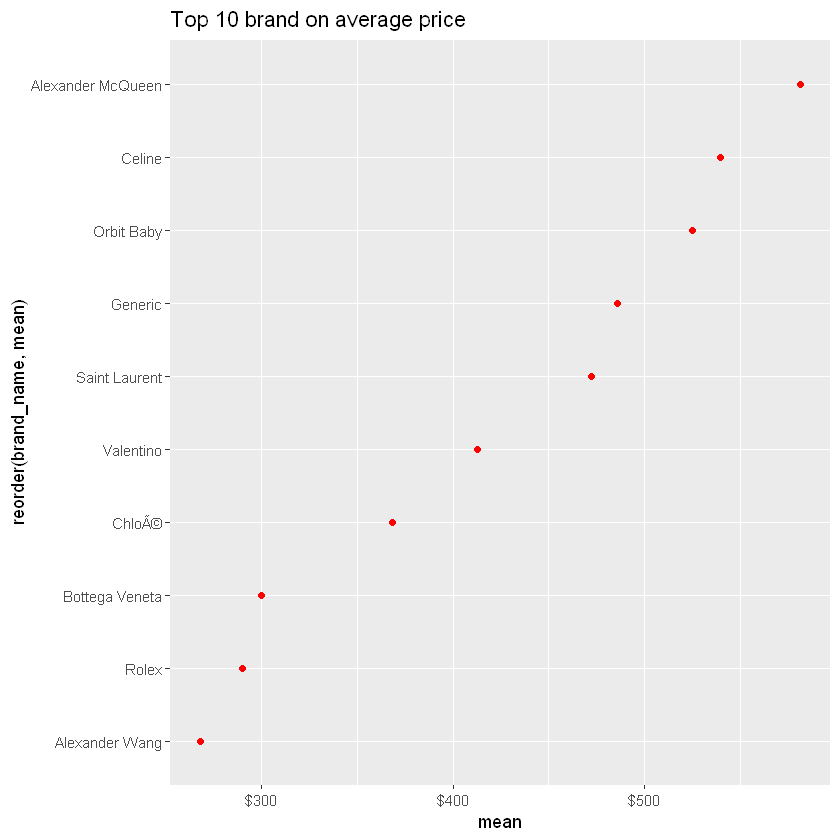

In [56]:
#Top 10 Brand based on average and median price

data=ddply(train_df,.(brand_name), summarize, "mean"=mean(price), "median"=median(price))
data %>% arrange(desc(mean)) %>% head(10) %>%
  ggplot(aes(x=reorder(brand_name,mean), y=mean)) +
   geom_point(color='red') +
     coord_flip() +
     scale_y_continuous(labels=scales::dollar) +
     labs(title= 'Top 10 brand on average price')

train_price = lm(price ~ price, train_df)

In [132]:
summary(train_price)


Call:
lm(formula = price ~ price, data = train_df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -26.95  -16.95   -9.95    2.05 1479.05 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.9536     0.2332   115.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40.39 on 29998 degrees of freedom


In [133]:
coef(summary(train_price))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),26.95358,0.2332245,115.5692,0


In [134]:
co = coef(summary(train_price))

In [135]:
co[ ,1]

[1] 26.95358

In [136]:
co[ , 4]

[1] 0

In [109]:
train_price = lm(price ~ price, train_df)

In [138]:
summary(train_df)

    train_id         name           item_condition_id category_name     
 Min.   :    0   Length:29999       Min.   :1.000     Length:29999      
 1st Qu.: 7500   Class :character   1st Qu.:1.000     Class :character  
 Median :14999   Mode  :character   Median :2.000     Mode  :character  
 Mean   :14999                      Mean   :1.906                       
 3rd Qu.:22499                      3rd Qu.:3.000                       
 Max.   :29998                      Max.   :5.000                       
  brand_name            price            shipping      item_description  
 Length:29999       Min.   :   0.00   Min.   :0.0000   Length:29999      
 Class :character   1st Qu.:  10.00   1st Qu.:0.0000   Class :character  
 Mode  :character   Median :  17.00   Median :0.0000   Mode  :character  
                    Mean   :  26.95   Mean   :0.4477                     
                    3rd Qu.:  29.00   3rd Qu.:1.0000                     
                    Max.   :1506.00   Max.   